In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "/home/rishabkhincha/acads/3-2/sop/datasets"]).decode("utf8"))

apnea-ecg
heartbeat



In [2]:
import os

os.listdir("/home/rishabkhincha/acads/3-2/sop/datasets/apnea-ecg")



['a06.apn',
 'c02.dat',
 'a01er.xws',
 'x21.dat',
 'a18.apn',
 'index.htmlCMOA',
 'c08.dat',
 'x14.xws',
 'a08.apn',
 'c01.qrs',
 'x25.dat',
 'a16.hea',
 'c01er.xws',
 'c03r.apn',
 'a01.xws',
 'a11.hea',
 'c02.xws',
 'c01r.dat',
 'a19.qrs',
 'index.htmlCDOD',
 'c09.dat',
 'a02er.apn',
 'a02.hea',
 'b03.xws',
 'x20.hea',
 'x20.xws',
 'x23.dat',
 'x32.xws',
 'x12.xws',
 'a03.apn',
 'x26.dat',
 'a04er.hea',
 'x02.qrs',
 'x08.xws',
 'b05.xws',
 'index.htmlCNOA',
 'x04.hea',
 'x16.hea',
 'a20.hea',
 'x17.hea',
 'a09.apn',
 'x17.xws',
 'x02.xws',
 'x13.hea',
 'c01.xws',
 'a11.xws',
 'c08.xws',
 'index.htmlCSOA',
 'x29.dat',
 'x25.hea',
 'a18.hea',
 'x11.hea',
 'a02er.hea',
 'x06.xws',
 'x13.qrs',
 'a09.dat',
 'a16.xws',
 'a19.xws',
 'a08.dat',
 'a05.hea',
 'a11.apn',
 'a20.qrs',
 'x15.xws',
 'x01.dat',
 'x07.xws',
 'a08.hea',
 'a10.dat',
 'b01er.qrs',
 'c10.hea',
 'a01.hea',
 'c02.hea',
 'x24.dat',
 'a02r.apn',
 'index.htmlCNOD',
 'x09.hea',
 'c02r.apn',
 'x22.dat',
 'b04.xws',
 'a04.apn',
 

In [3]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
recordname = "/home/rishabkhincha/acads/3-2/sop/datasets/apnea-ecg/a01"

record = wfdb.rdrecord(recordname) 

In [5]:
record.p_signal
# record[1]['fs']

array([[-0.06 ],
       [-0.065],
       [-0.06 ],
       ...,
       [ 0.   ],
       [ 0.   ],
       [ 0.   ]])

In [6]:
annotation = wfdb.rdann(recordname, extension="apn")

# annotation.contained_labels


In [7]:
annotation.get_label_fields()

['symbol']

In [8]:
annotation.symbol[:10]


['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']

In [9]:
np.unique(annotation.symbol, return_counts=True)


(array(['A', 'N'], dtype='<U1'), array([470,  19]))

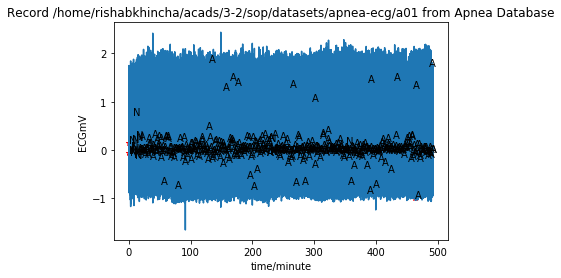

{'adc_gain': [200.0],
 'adc_res': [12],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [5827],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'fs': 100,
 'init_value': [-12],
 'n_sig': 1,
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 0.   ]]),
 'record_name': 'a01',
 'samps_per_frame': [1],
 'sig_len': 2957000,
 'sig_name': ['ECG'],
 'skew': [None],
 'units': ['mV']}

{'ann_len': 489,
 'aux_note': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',

In [10]:
record_small = wfdb.rdrecord(recordname) 
annotation_small = wfdb.rdann(recordname, extension="apn")
annotation_small.fs = 1000
wfdb.plot_wfdb(record_small, annotation=annotation_small, plot_sym = True, 
             title='Record ' + recordname + ' from Apnea Database',
             time_units = 'minutes')
display(record.__dict__)
display(annotation_small.__dict__)

In [11]:
wfdb.rdann(recordname, extension="apn", sampto = 99999).__dict__

{'ann_len': 17,
 'aux_note': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'chan': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'contained_labels': None,
 'custom_labels': None,
 'description': None,
 'extension': 'apn',
 'fs': 100,
 'label_store': None,
 'num': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'record_name': 'a01',
 'sample': array([    0,  6000, 12000, 18000, 24000, 30000, 36000, 42000, 48000,
        54000, 60000, 66000, 72000, 78000, 84000, 90000, 96000]),
 'subtype': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'A',
  'A',
  'A']}

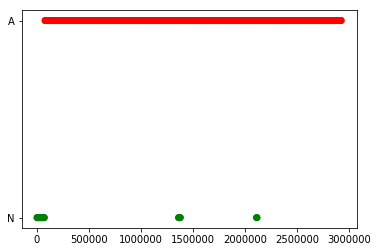

In [12]:
color= ['red' if l == 'A' else 'green' for l in annotation_small.symbol]
plt.scatter(annotation_small.sample, annotation_small.symbol, c=color)

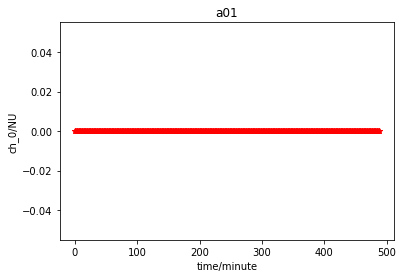

In [13]:
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

In [14]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [15]:
record_test = wfdb.rdrecord(recordname, sampto=4500).p_signal
ecg_signal = np.reshape(record_test, len(record_test))




In [16]:
ecg_signal

array([-0.06 , -0.065, -0.06 , ...,  0.105,  0.065,  0.03 ])

In [17]:
# linear spaced vector between 0.5 pi and 1.5 pi 
t = np.linspace(0.5*np.pi,1.5 * np.pi, 15)

# use sine to approximate QRS feature
qrs_filter = np.sin(t)

# stage 1: compute cross correlation between ecg and qrs filter
similarity = np.correlate(ecg_signal, qrs_filter, mode="same")

# stage 2: find peaks using a threshold
peaks = np.where(similarity > 1.9)

In [18]:
peaks

(array([  41,   42,   43,   44,  130,  131,  132,  133,  214,  215,  216,
         217,  296,  297,  298,  299,  300,  379,  380,  381,  382,  383,
         467,  468,  469,  470,  471,  561,  562,  563,  564,  565,  658,
         659,  660,  661,  662,  752,  753,  754,  755,  756,  845,  846,
         847,  848,  849,  939,  940,  941,  942,  943, 1039, 1040, 1041,
        1042, 1043, 1142, 1143, 1144, 1145, 1243, 1244, 1245, 1246, 1341,
        1342, 1343, 1344, 1345, 1438, 1439, 1440, 1441, 1442, 1534, 1535,
        1536, 1537, 1631, 1632, 1633, 1634, 1635, 1732, 1733, 1734, 1735,
        1826, 1827, 1828, 1829, 1830, 1916, 1917, 1918, 1919, 1920, 2002,
        2003, 2004, 2005, 2087, 2088, 2089, 2090, 2091, 2184, 2185, 2186,
        2187, 2188, 2277, 2278, 2279, 2280, 2281, 2370, 2371, 2372, 2373,
        2374, 2454, 2455, 2456, 2457, 2458, 2531, 2532, 2533, 2534, 2535,
        2608, 2609, 2610, 2611, 2612, 2613, 2689, 2690, 2691, 2692, 2693,
        2771, 2772, 2773, 2774, 2854, 

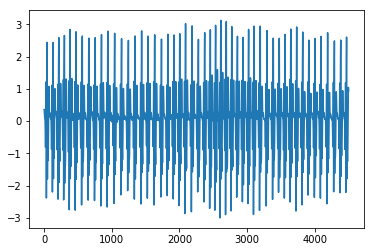

In [19]:
plt.plot(similarity)


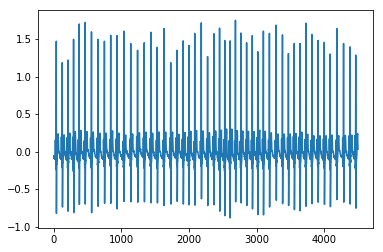

In [20]:
plt.plot(ecg_signal)



In [21]:
# # detect peaks 
# peaks, similarity = detect_peaks(df.heartrate, threshold=0.3, qrs_filter=qrs_filter)

# # group peaks so we get a single peak per beat
# grouped_peaks = group_peaks(peaks)

# # RR-intervals are the differences between successive peaks
# rr = np.diff(grouped_peaks)

In [22]:
ecg_signal.shape[0]

4500

41
42
43
44
130
131
132
133
214
215
216
217
296
297
298
299
300
379
380
381
382
383
467
468
469
470
471
561
562
563
564
565
658
659
660
661
662
752
753
754
755
756
845
846
847
848
849
939
940
941
942
943
1039
1040
1041
1042
1043
1142
1143
1144
1145
1243
1244
1245
1246
1341
1342
1343
1344
1345
1438
1439
1440
1441
1442
1534
1535
1536
1537
1631
1632
1633
1634
1635
1732
1733
1734
1735
1826
1827
1828
1829
1830
1916
1917
1918
1919
1920
2002
2003
2004
2005
2087
2088
2089
2090
2091
2184
2185
2186
2187
2188
2277
2278
2279
2280
2281
2370
2371
2372
2373
2374
2454
2455
2456
2457
2458
2531
2532
2533
2534
2535
2608
2609
2610
2611
2612
2613
2689
2690
2691
2692
2693
2771
2772
2773
2774
2854
2855
2856
2857
2858
2938
2939
2940
2941
2942
3019
3020
3021
3022
3023
3102
3103
3104
3105
3106
3191
3192
3193
3194
3195
3291
3292
3293
3294
3295
3384
3385
3386
3387
3388
3473
3474
3475
3476
3558
3559
3560
3561
3562
3643
3644
3645
3646
3647
3730
3731
3732
3733
3734
3820
3821
3822
3823
3910
3911
3912
3913
3914
4002
4

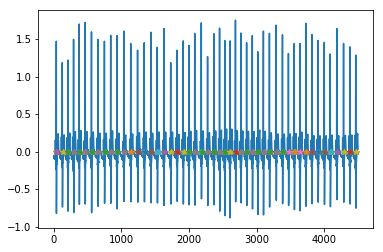

In [23]:
plt.plot(ecg_signal)
# plt.plot(np.array(peaks), 0, '*')
for i in range(ecg_signal.shape[0]):
    if(i in np.array(peaks)):
        print(i)
        plt.plot(i,0,  '*')

In [24]:
def cluster(data, maxgap):
    '''Arrange data into groups where successive elements
       differ by no more than maxgap
    '''
    groups = [[data[0]]]
    for x in data[1:]:
        if abs(x - groups[-1][-1]) <= maxgap:
            groups[-1].append(x)
        else:
            groups.append([x])
    return groups
groups=cluster(peaks[0], 10)

In [25]:
groups

[[41, 42, 43, 44],
 [130, 131, 132, 133],
 [214, 215, 216, 217],
 [296, 297, 298, 299, 300],
 [379, 380, 381, 382, 383],
 [467, 468, 469, 470, 471],
 [561, 562, 563, 564, 565],
 [658, 659, 660, 661, 662],
 [752, 753, 754, 755, 756],
 [845, 846, 847, 848, 849],
 [939, 940, 941, 942, 943],
 [1039, 1040, 1041, 1042, 1043],
 [1142, 1143, 1144, 1145],
 [1243, 1244, 1245, 1246],
 [1341, 1342, 1343, 1344, 1345],
 [1438, 1439, 1440, 1441, 1442],
 [1534, 1535, 1536, 1537],
 [1631, 1632, 1633, 1634, 1635],
 [1732, 1733, 1734, 1735],
 [1826, 1827, 1828, 1829, 1830],
 [1916, 1917, 1918, 1919, 1920],
 [2002, 2003, 2004, 2005],
 [2087, 2088, 2089, 2090, 2091],
 [2184, 2185, 2186, 2187, 2188],
 [2277, 2278, 2279, 2280, 2281],
 [2370, 2371, 2372, 2373, 2374],
 [2454, 2455, 2456, 2457, 2458],
 [2531, 2532, 2533, 2534, 2535],
 [2608, 2609, 2610, 2611, 2612, 2613],
 [2689, 2690, 2691, 2692, 2693],
 [2771, 2772, 2773, 2774],
 [2854, 2855, 2856, 2857, 2858],
 [2938, 2939, 2940, 2941, 2942],
 [3019, 3020, 3

In [26]:
def val_amp(data):
    return data[np.argmin(ecg_signal[data])]
#     return min(ecg_signal[data]), data[np.argmin(ecg_signal[data])]
ind=[]
for x in range(0, len(groups)):
    ind.append(val_amp(groups[x]))

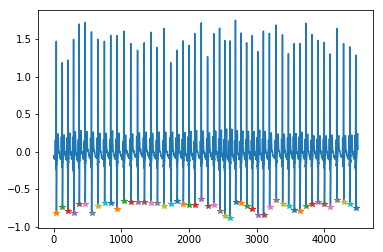

In [27]:
plt.plot(ecg_signal)

for i in range(ecg_signal.shape[0]):
    if(i in np.array(ind)):
        plt.plot(i,ecg_signal[i],  '*')   

In [28]:
len(ind)

50

In [29]:
rr_int = np.array([t - s for s, t in zip(ind, ind[1:])])

In [30]:
# rr_int[np.argmin(rr_int[24000:25000])]
# max(rr_int[24000:25000])
# ind[24085]

In [31]:
np.mean(rr_int)


90.34693877551021

In [32]:
np.std(rr_int)

6.683977248120644

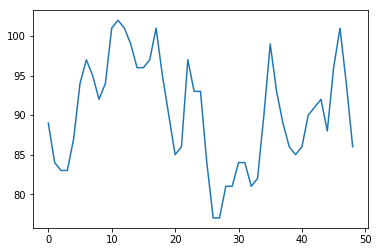

In [33]:
plt.plot(rr_int)

In [34]:
np.sort(rr_int)[::-1]

array([102, 101, 101, 101, 101,  99,  99,  97,  97,  97,  96,  96,  96,
        95,  95,  94,  94,  94,  93,  93,  93,  92,  92,  91,  90,  90,
        90,  89,  89,  88,  87,  86,  86,  86,  86,  85,  85,  84,  84,
        84,  84,  83,  83,  82,  81,  81,  81,  77,  77])

In [35]:
len(rr_int[rr_int<50])

0

In [36]:
len(rr_int)

49

In [37]:
# check complete data
# check if the peak is correct
# check template matching

1000

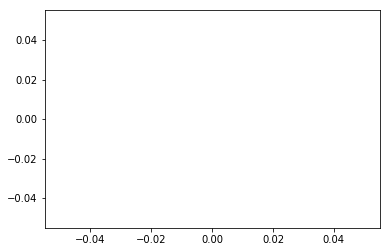

In [38]:
# plt.plot(ecg_signal[2377681:2379681])
plt.plot(similarity[2377681:2379681])
2378681-2377681

In [39]:
len(ecg_signal)

4500

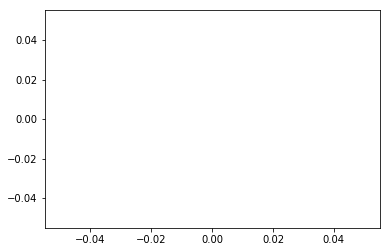

In [40]:
plt.plot(rr_int[24000:24500])

In [41]:
rr_int


array([ 89,  84,  83,  83,  87,  94,  97,  95,  92,  94, 101, 102, 101,
        99,  96,  96,  97, 101,  95,  90,  85,  86,  97,  93,  93,  84,
        77,  77,  81,  81,  84,  84,  81,  82,  90,  99,  93,  89,  86,
        85,  86,  90,  91,  92,  88,  96, 101,  94,  86])